# PROBLEMA 1
Suponga que se quiere hacer un estudio estadístico relacionado con alguna variable aleatoria de una población en particular. Para este fin, se han recopilado datos relacionados con dicha variable a través de diversos muestreos. Los datos recopilados se presentan en el archivo CSV adjunto (exam_data.csv), donde los datos en cada una de las columnas representa un conjunto muestral de n = 5000 elementos.

**Utilizando dicha información determinar lo siguiente:**
- a. Una estimación de la media y deviación estándar de la población de la cual fueron sustraídas las muestras.
- b. ¿Qué puede decir con respecto de la distribución de la media muestral?
- c. ¿Qué observaciones tiene respecto al proceso de muestreo?

## Librerias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Leer csv

Para la lectura del csv solamente debemos de tener precaucion con el hecho de que los datos vienen con una columna adicional al inicio llamada "Unnamed: 0", la cual es simplemente el index del dataframe original de donde salieron los datos, por lo que debemos de eliminarla al momento de leer el archivo.

In [2]:
df1 = pd.read_csv('data/exam_data.csv')
# elimina Unnamed: 0
df1 = df1.drop(columns=['Unnamed: 0'])
df1.head(10)

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,49.836306,45.101541,63.531488,69.009866,40.095654,84.906605,81.128278,86.037926,22.687573,89.401010,...,56.128399,93.800320,4.386771,16.349008,27.550263,42.603079,2.994481,79.478474,3.333662,45.342062
1,49.994347,45.773061,62.897416,68.556472,39.163533,85.087188,81.363247,85.743628,22.345356,88.697771,...,55.211598,93.662061,2.691202,15.798940,28.204315,42.388385,4.132100,79.523014,1.561063,46.735617
2,50.156428,45.000371,62.585317,69.176546,39.984561,85.171361,80.517995,85.979397,22.081638,89.397012,...,56.777065,94.845762,2.383015,16.875812,27.607749,41.460080,3.463460,78.510010,1.542030,47.052018
3,49.696662,45.493168,62.385483,68.946933,40.178232,84.701594,80.987396,85.579412,21.121060,88.496242,...,55.515248,94.502804,3.617272,15.814422,27.868727,42.747889,4.461889,78.852283,2.006766,47.503506
4,49.481798,44.913164,63.169940,69.125740,39.513078,84.637430,81.422197,85.073721,21.382952,88.695730,...,55.709846,93.913137,2.770727,16.534483,27.284645,43.859045,3.642493,78.656056,2.624068,47.067935
5,50.028949,45.251895,62.784015,69.964565,39.971670,85.595685,80.148644,86.341459,22.054040,89.440632,...,55.586543,94.874470,2.872235,16.163602,27.278864,43.138915,4.636375,78.840848,0.920369,47.818549
6,49.488570,44.342417,62.410067,68.973961,39.707925,85.201554,81.674802,87.206745,21.619606,88.618408,...,56.204980,94.238872,2.494874,15.682411,28.094896,42.780624,3.819681,79.674548,1.103494,46.438327
7,50.993590,44.115163,62.926313,68.687825,40.007977,85.239049,81.146014,86.339812,23.173693,89.511708,...,55.802359,93.324270,2.625556,15.351869,28.394650,43.360661,2.973661,78.561409,1.701424,46.741638
8,49.405534,44.462871,63.677012,69.391253,40.109682,86.039841,81.512589,86.119336,21.679343,88.711364,...,56.303586,94.059046,3.704879,15.408748,27.947071,43.513815,2.756307,79.571173,1.817062,47.400893
9,50.264496,45.557865,63.048611,69.854431,40.045069,85.406365,81.065284,85.939307,23.593950,88.344303,...,56.263645,93.150264,2.294697,15.924957,28.190021,43.064716,3.722637,79.242152,1.678051,46.268911


## Calcular media y desviación estándar poblacional

De acuerdo con lo que se solicita en el inciso a, para estimar la media y desviación estándar poblacional a partir de las muestras podemos partir de lo que nos indica el Teorema del Límite Central. Para este caso, el TLC dice que que la media muestral deberia de seguir una distribución normal, tal que:

$\bar{X_i}=\frac{1}{n}\sum_{i=1}^n{(x_i)}\in N(\mu_{\bar{X}},\sigma_{\bar{X}})$

Y segun lo que nos indica el TLC, la media y desviación estándar de la media muestral estan dadas por:

$\mu_{\bar{X}}=\mu$

$\sigma_{\bar{X}}=\frac{\sigma}{\sqrt{n}}$

Por lo tanto, lo que haremos primero es calcular para cada una de nuestras muestras la media y desviación estándar (NOTA: no es necesario calcular la desviación estándar para cada muestra, ya que la estimacion la podemos obtener usando la media muestral, pero para fines ilustrativos, lo haremos).

In [3]:
# Calcular la media de cada columna para obtener 'S_dist'
Xmean_dist = df1.mean(axis=0)
Xsigma_dist = df1.std(axis=0)

Ya que tenemos estos valores, podemos imprimir un histograma de como es que se ven las distribuciones de media y desviacion estandar de cada una de nuestras muestas. Para esto vamos a requerir de una pequeña funcion que nos dará el numero de bins adecuado para la cantidad de nuestros datos usando la regla de Stugres.

In [4]:
def get_n_bins(data):
    # Calcula el número óptimo de bins para un histograma usando la regla de Sturges.
    M = len(data)
    c = int(np.ceil(1+np.log2(M)))
    return c

n_bins = get_n_bins(Xmean_dist)
n_bins

8

Dada la cantidad de nuestros datos, el numero adecuado de bins es de 8, por lo que el siguiente paso es imprimir nuestras graficas de distribucion.

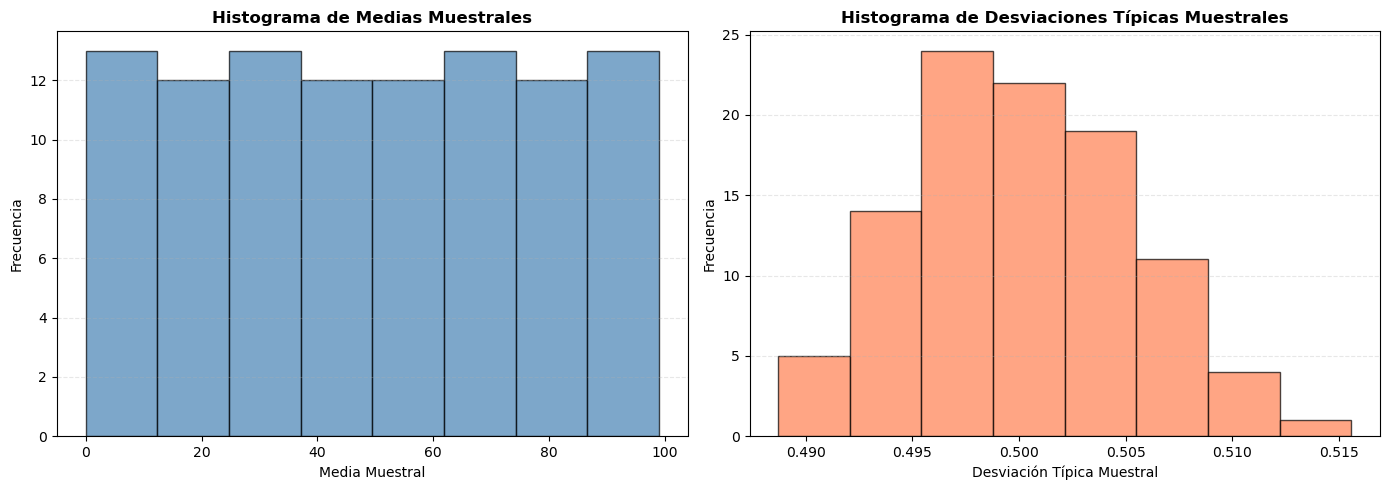

In [5]:
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

ax[0].hist(Xmean_dist, bins=n_bins, color='steelblue', edgecolor='black', alpha=0.7)
ax[0].set_title('Histograma de Medias Muestrales', fontsize=12, fontweight='bold')
ax[0].set_xlabel('Media Muestral', fontsize=10)
ax[0].set_ylabel('Frecuencia', fontsize=10)
ax[0].grid(axis='y', alpha=0.3, linestyle='--')

ax[1].hist(Xsigma_dist, bins=n_bins, color='coral', edgecolor='black', alpha=0.7)
ax[1].set_title('Histograma de Desviaciones Típicas Muestrales', fontsize=12, fontweight='bold')
ax[1].set_xlabel('Desviación Típica Muestral', fontsize=10)
ax[1].set_ylabel('Frecuencia', fontsize=10)
ax[1].grid(axis='y', alpha=0.3, linestyle='--')

plt.tight_layout()
plt.show()

Podemos observar que la distribucion de las medias muestrales tiene una forma uniforme, mientras que la desviacion estandar muestral tiene una forma similar a una distribucion normal. Esto ya nos indica bastante sobre si el proceso de muestreo fue adecuado o no, pero eso lo veremos mas adelante.

Lo que sigue es obtener la estimacion de la media y desviacion estandar poblacional. Para esto, usaremos las formulas que nos da el TLC.

Para el caso de la media poblacional $\mu$, la estimacion es simplemente la media de las medias muestrales.
Por otro lado, para la desviacion estandar poblacional $\sigma$, la estimacion es la desviacion estandar de las medias muestrales multiplicada por la raiz cuadrada del tamano de las muestras (n=5000).

In [6]:
n = 5000

Xmean_mu = np.mean(Xmean_dist)
Xmean_sigma = np.std(Xmean_dist)

mu = Xmean_mu
sigma = Xmean_sigma * np.sqrt(n)

print("Xmean_mu = ", Xmean_mu)
print("Xmean_sigma = ", Xmean_sigma)

print("Media de la poblacion = ", mu)
print("Desviacion estandar de la poblacion = ", sigma)

Xmean_mu =  49.49887914087672
Xmean_sigma =  28.866505958504117
Media de la poblacion =  49.49887914087672
Desviacion estandar de la poblacion =  2041.1702112420141


- b. ¿Qué puede decir con respecto de la distribución de la media muestral?
La distribución de la media muestral para el caso de los datos prorcionados no sigue una distribución normal, sino que sigue una distribución uniforme. Esto puede ser un indicativo de que el proceso de muestreo no fue el adecuado, ya que de acuerdo con el Teorema del Límite Central, la media muestral debería de seguir una distribución normal.

- c. ¿Qué observaciones tiene respecto al proceso de muestreo?
El proceso de muestreo no fue el adecuado, ya que la distribución de la media muestral no sigue una distribución normal, lo cual es un indicativo de que las muestras no fueron tomadas de manera sesgada. Una pista de como es que fueron tomadas estas muestras la podemos ver usando la funcion de pandas describe(), la cual nos da un resumen estadístico de los datos, como se muestra a continuación:

In [7]:
df1.describe()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,...,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,50.003154,45.002244,63.005938,69.002520,39.987563,85.005311,80.992974,85.997633,21.992712,88.990294,...,55.991926,94.018503,3.000903,16.000207,28.008304,42.992497,3.994329,78.999481,1.996866,47.004513
std,0.506513,0.497358,0.502912,0.502643,0.499671,0.498787,0.505004,0.494344,0.503575,0.498286,...,0.496289,0.495209,0.508209,0.493130,0.495738,0.496396,0.501116,0.510044,0.494673,0.504037
min,48.192637,43.251066,61.166000,67.169046,38.258716,82.943134,78.956481,84.341196,20.167641,87.123571,...,54.348102,92.135007,1.060616,14.314606,26.031356,41.266127,2.217248,77.294830,-0.055217,45.187099
25%,49.657600,44.668883,62.664810,68.660587,39.653657,84.682096,80.652926,85.665564,21.659410,88.646842,...,55.662316,93.683647,2.655064,15.674184,27.692034,42.657497,3.662697,78.657330,1.656113,46.657011
50%,50.003003,44.996781,63.003768,69.004969,39.987608,85.008008,80.992202,85.990974,21.996301,88.982635,...,55.989564,94.016909,3.000392,15.999651,28.006280,42.998856,3.997923,79.006190,2.006427,46.998698
75%,50.351387,45.337208,63.348957,69.329303,40.323485,85.336381,81.329014,86.331532,22.333155,89.332115,...,56.330395,94.358895,3.340289,16.332447,28.345128,43.324922,4.327232,79.337538,2.342612,47.345158
max,51.924468,46.719402,64.857114,70.753352,41.830355,86.896359,82.673025,87.776073,23.874984,91.086147,...,57.791622,96.181395,4.892013,17.776613,29.645463,44.771643,5.699125,80.811203,3.590839,48.757612


Podemos observar que en los valores de min y max de cada una de las muestras son muy similares entre si, lo cual nos indica que las muestras fueron tomadas de manera sesgada (casi de manera consecutiva sobre una lista ordenada), ya que en un muestreo aleatorio, los valores de minimos y maximos deberian de variar mas entre las diferentes muestras.